<h1>Chapter 1.4.13 Hough Line Transform</h1>

In [39]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

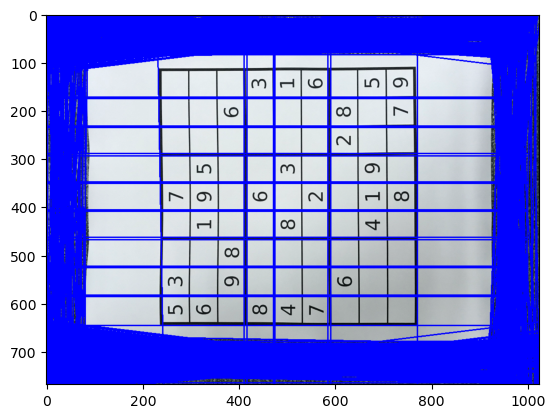

In [40]:
img = cv2.imread('./datasets/1.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)
lines = cv2.HoughLines(edges,1,np.pi/180,300)


for i in range(500):
  for rho,theta in lines[i]:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)


cv2.imwrite('houghlines3.jpg',img)
plt.imshow(img)

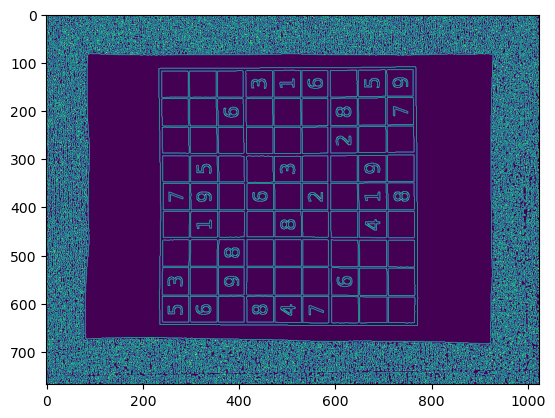

In [41]:
plt.imshow(edges)

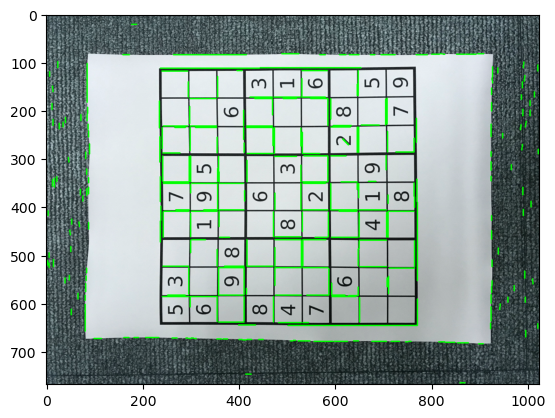

In [42]:
img = cv2.imread('./datasets/1.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)
minLineLength = 100
maxLineGap = 10
lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,maxLineGap)

for i in range(300):
  for x1,y1,x2,y2 in lines[i]:
    cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)


cv2.imwrite('houghlines5.jpg',img)
plt.imshow(img)

In [43]:
def nothing(x):
  pass

In [44]:
img = cv2.imread('./datasets/1.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)

In [45]:
minLineLength = 100
maxLineGap = 10
lineNums = 10
lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,maxLineGap)

In [46]:
# Create a black image, a window
cv2.namedWindow('image')
# create trackbars for color change
cv2.createTrackbar('minLineLength','image',0,500,nothing)
cv2.createTrackbar('maxLineGap','image',0,500,nothing)
cv2.createTrackbar('lineNums','image',0,100,nothing)

cv2.setTrackbarPos('minLineLength','image',minLineLength)
cv2.setTrackbarPos('maxLineGap','image',maxLineGap)
cv2.setTrackbarPos('lineNums','image',lineNums)

In [47]:
while(1):
  cv2.imshow('image',img)
  k = cv2.waitKey(1) & 0xFF
  if k == 27:
    break
  # get current positions of four trackbars
  minLineLength = cv2.getTrackbarPos('minLineLength','image')
  maxLineGap = cv2.getTrackbarPos('maxLineGap','image')
  lineNums = cv2.getTrackbarPos('lineNums','image')
  lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,maxLineGap)
  lineNum = min(lineNums, lines.shape[0])
  
  for i in range(lineNum):
    for x1,y1,x2,y2 in lines[i]:
      cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)

In [48]:
cv2.destroyAllWindows()

# mac에서 창이 안꺼지는 현상 해결을 위한 코드
cv2.waitKey(1)
cv2.waitKey(1)
cv2.waitKey(1)
cv2.waitKey(1)
cv2.waitKey(1)


-1